In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("data\Tripura.csv", encoding='ISO-8859-1',low_memory=False)

df

,CORPORATE_IDENTIFICATION_NUMBER,Company_Name,Company_status,Company_class,Company_Category,Company_sub_category,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,Industrial_Class,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,Registered_Office_Address,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,Latest_Year_AR,Latest_Year_BS
0,U01100TR2011PTC008327,GOMATI AGRI PRODUCER PRIVATE LIMITED,Strike Off,Private,Company limited by Shares,Non-govt company,21-07-11,Tripura,2000000,1000000.0,1100,"Agriculture, hunting and related service activ...","Vill : Bagma, P .O. : Bagma Udaipur , South Tr...",RoC-Shillong,akansanju@gmail.com,31-03-12,31-03-12
1,U01100TR2016PTC013479,KRISHI O KRISHAK PRODUCER COMPANYLIMITED,Active,Private,Company limited by Shares,Non-govt company,18-05-16,Tripura,2000000,1688000.0,1100,"Agriculture, hunting and related service activ...","VILLAGE CHATARIA UDAIPUR, POST GOKULPUR DIST G...",RoC-Shillong,bswnath@gmail.com,31-03-20,31-03-20
2,U01100TR2017PTC013507,PILAK ORGANIC PRIVATE LIMITED,Active,Private,Company limited by Shares,Non-govt company,20-02-17,Tripura,1000000,1000000.0,1100,"Agriculture, hunting and related service activ...","HAIRMARA S.D. MISSION AGARTALA , West Tripura ...",RoC-Shillong,organicsupplyagency@yahoomail.com,NaN,NaN
3,U01100TR2018PTC013562,AGROOT AGRO FISHERY AND ANIMAL HUSBANDRYPRIVAT...,Active,Private,Company limited by Shares,Non-govt company,20-04-18,Tripura,1000000,300000.0,1100,"Agriculture, hunting and related service activ...","Chayana Begam, W/o Kamal Hossain Durganagar, B...",RoC-Shillong,mkhossain457@gmail.com,NaN,NaN
4,U01100TR2018PTC013568,TRIPRA PAPER MILL PRIVATE LIMITED,Active,Private,Company limited by Shares,Non-govt company,15-05-18,Tripura,200000,200000.0,1100,"Agriculture, hunting and related service activ...","RAMNAGAR A.K. ROAD, MOJA- AGARTALA, RAMNAGAR A...",RoC-Shillong,chowdhurypaper@gmail.com,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,U93090TR2019PTC013666,SHANKHU TECH PRIVATE LIMITED,Active,Private,Company limited by Shares,Non-govt company,14-05-19,Tripura,1000000,20000.0,93090,"Other community, social and personal service a...","PT NO-453 9,OPP TRIPURA UNIVERSITY (ADMINISTRA...",RoC-Shillong,NANDYS.SAGAR@YAHOO.COM,NaN,NaN
780,U93090TR2019PTC013725,HABIBE HAIR & SKIN UNISEX SALOONE ANDACADEMY P...,Active,Private,Company limited by Shares,Non-govt company,15-11-19,Tripura,100000,50000.0,93090,"Other community, social and personal service a...","C/o Nitai Paul Radhanagar Po-Agartala,Behind B...",RoC-Shillong,mahekenterprise014@gmail.com,NaN,NaN
781,U93090TR2019PTC013735,INTEGRATED SYSTEMCERT PRIVATE LIMITED,Active,Private,Company limited by Shares,Non-govt company,28-11-19,Tripura,1000000,100000.0,93090,"Other community, social and personal service a...","2/173, MATH CHOWMUHANI, A.A ROAD, DHALESWAR, A...",RoC-Shillong,ashik.tnv@gmail.com,NaN,NaN
782,U93090TR2020PTC013773,RBCS SOLUTIONS PRIVATE LIMITED,Active,Private,Company limited by Shares,Non-govt company,20-03-20,Tripura,1000000,1000000.0,93090,"Other community, social and personal service a...","C/O BILLAL MIAH VILL KAMTHANA, WEST TRIPURA TR...",RoC-Shillong,BILLALMIAH@RBCSM.COM,NaN,NaN


In [3]:
# Assuming df is your DataFrame

# Filter out rows with unknown or invalid values in 'DATE_OF_REGISTRATION'
df = df[pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce', dayfirst=True).notna()]

# Convert 'DATE_OF_REGISTRATION' to datetime format
df['DATE_OF_REGISTRATION'] = pd.to_datetime(df['DATE_OF_REGISTRATION'], errors='coerce', dayfirst=True)

# Extract year from the registration date
df['Registration_Year'] = df['DATE_OF_REGISTRATION'].dt.year

In [4]:
# Check for missing values
df.isnull().sum()

CORPORATE_IDENTIFICATION_NUMBER             0
Company_Name                                0
Company_status                              0
Company_class                               0
Company_Category                            0
Company_sub_category                        0
DATE_OF_REGISTRATION                        0
REGISTERED_STATE                            0
AUTHORIZED_CAP                              0
PAIDUP_CAPITAL                              0
Industrial_Class                            0
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN      0
Registered_Office_Address                   0
REGISTRAR_OF_COMPANIES                      0
EMAIL_ADDR                                 58
Latest_Year_AR                            427
Latest_Year_BS                            425
Registration_Year                           0
dtype: int64

In [5]:
df=df.drop(['DATE_OF_REGISTRATION','EMAIL_ADDR'],axis=1)
df

,CORPORATE_IDENTIFICATION_NUMBER,Company_Name,Company_status,Company_class,Company_Category,Company_sub_category,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,Industrial_Class,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,Registered_Office_Address,REGISTRAR_OF_COMPANIES,Latest_Year_AR,Latest_Year_BS,Registration_Year
0,U01100TR2011PTC008327,GOMATI AGRI PRODUCER PRIVATE LIMITED,Strike Off,Private,Company limited by Shares,Non-govt company,Tripura,2000000,1000000.0,1100,"Agriculture, hunting and related service activ...","Vill : Bagma, P .O. : Bagma Udaipur , South Tr...",RoC-Shillong,31-03-12,31-03-12,2011
1,U01100TR2016PTC013479,KRISHI O KRISHAK PRODUCER COMPANYLIMITED,Active,Private,Company limited by Shares,Non-govt company,Tripura,2000000,1688000.0,1100,"Agriculture, hunting and related service activ...","VILLAGE CHATARIA UDAIPUR, POST GOKULPUR DIST G...",RoC-Shillong,31-03-20,31-03-20,2016
2,U01100TR2017PTC013507,PILAK ORGANIC PRIVATE LIMITED,Active,Private,Company limited by Shares,Non-govt company,Tripura,1000000,1000000.0,1100,"Agriculture, hunting and related service activ...","HAIRMARA S.D. MISSION AGARTALA , West Tripura ...",RoC-Shillong,NaN,NaN,2017
3,U01100TR2018PTC013562,AGROOT AGRO FISHERY AND ANIMAL HUSBANDRYPRIVAT...,Active,Private,Company limited by Shares,Non-govt company,Tripura,1000000,300000.0,1100,"Agriculture, hunting and related service activ...","Chayana Begam, W/o Kamal Hossain Durganagar, B...",RoC-Shillong,NaN,NaN,2018
4,U01100TR2018PTC013568,TRIPRA PAPER MILL PRIVATE LIMITED,Active,Private,Company limited by Shares,Non-govt company,Tripura,200000,200000.0,1100,"Agriculture, hunting and related service activ...","RAMNAGAR A.K. ROAD, MOJA- AGARTALA, RAMNAGAR A...",RoC-Shillong,NaN,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,U93090TR2019PTC013666,SHANKHU TECH PRIVATE LIMITED,Active,Private,Company limited by Shares,Non-govt company,Tripura,1000000,20000.0,93090,"Other community, social and personal service a...","PT NO-453 9,OPP TRIPURA UNIVERSITY (ADMINISTRA...",RoC-Shillong,NaN,NaN,2019
780,U93090TR2019PTC013725,HABIBE HAIR & SKIN UNISEX SALOONE ANDACADEMY P...,Active,Private,Company limited by Shares,Non-govt company,Tripura,100000,50000.0,93090,"Other community, social and personal service a...","C/o Nitai Paul Radhanagar Po-Agartala,Behind B...",RoC-Shillong,NaN,NaN,2019
781,U93090TR2019PTC013735,INTEGRATED SYSTEMCERT PRIVATE LIMITED,Active,Private,Company limited by Shares,Non-govt company,Tripura,1000000,100000.0,93090,"Other community, social and personal service a...","2/173, MATH CHOWMUHANI, A.A ROAD, DHALESWAR, A...",RoC-Shillong,NaN,NaN,2019
782,U93090TR2020PTC013773,RBCS SOLUTIONS PRIVATE LIMITED,Active,Private,Company limited by Shares,Non-govt company,Tripura,1000000,1000000.0,93090,"Other community, social and personal service a...","C/O BILLAL MIAH VILL KAMTHANA, WEST TRIPURA TR...",RoC-Shillong,NaN,NaN,2020


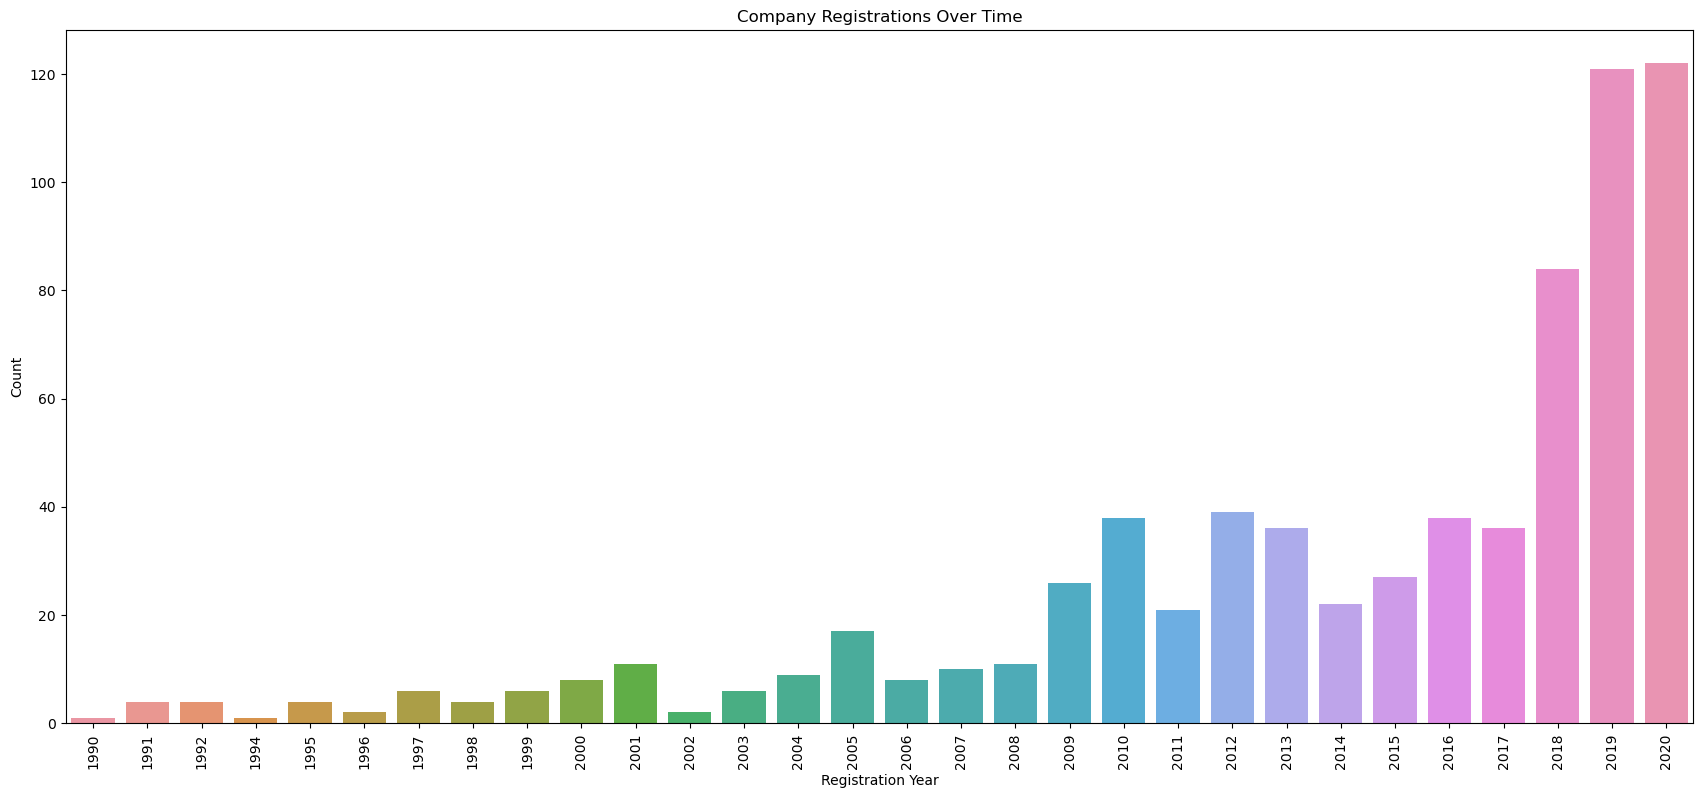

In [6]:
# EDA - Trends over time
plt.figure(figsize=(21, 9))
sns.countplot(x='Registration_Year', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Company Registrations Over Time')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

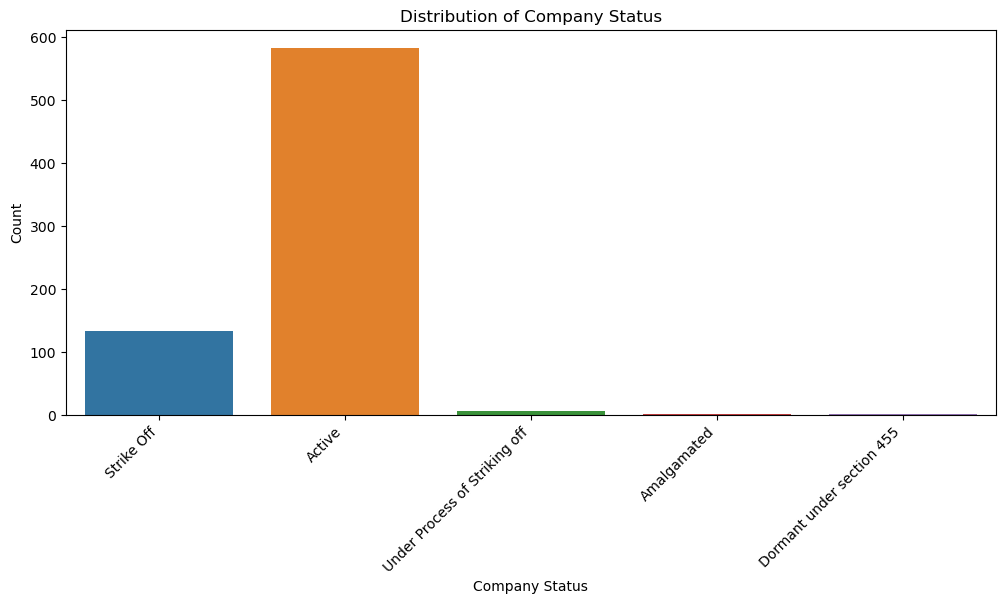

In [7]:
# EDA - Company Status
plt.figure(figsize=(12, 5))
sns.countplot(x='Company_status', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Distribution of Company Status')
plt.xlabel('Company Status')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()

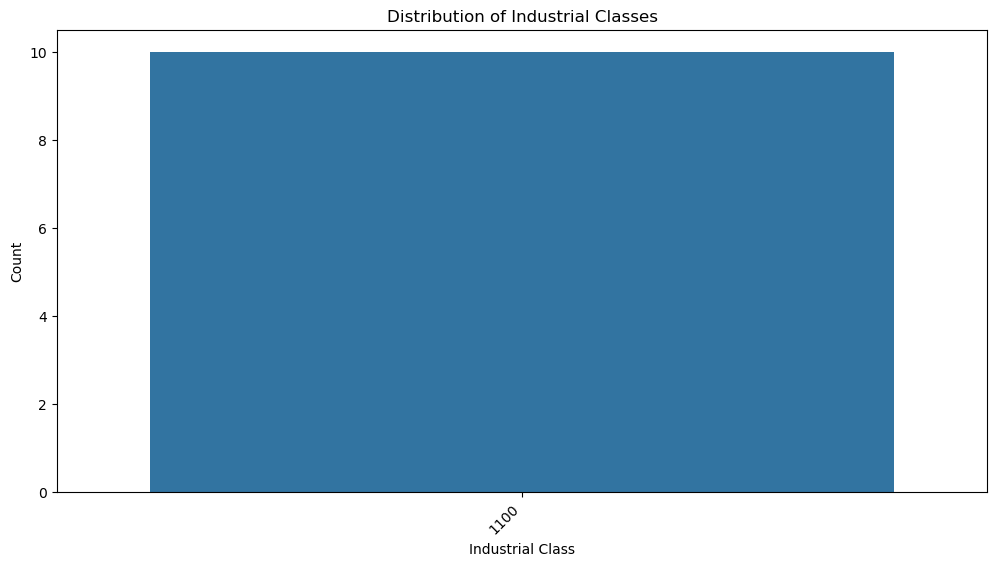

In [8]:
# EDA - Industrial Class Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Industrial_Class', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)].head(10))
plt.title('Distribution of Industrial Classes')
plt.xlabel('Industrial Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

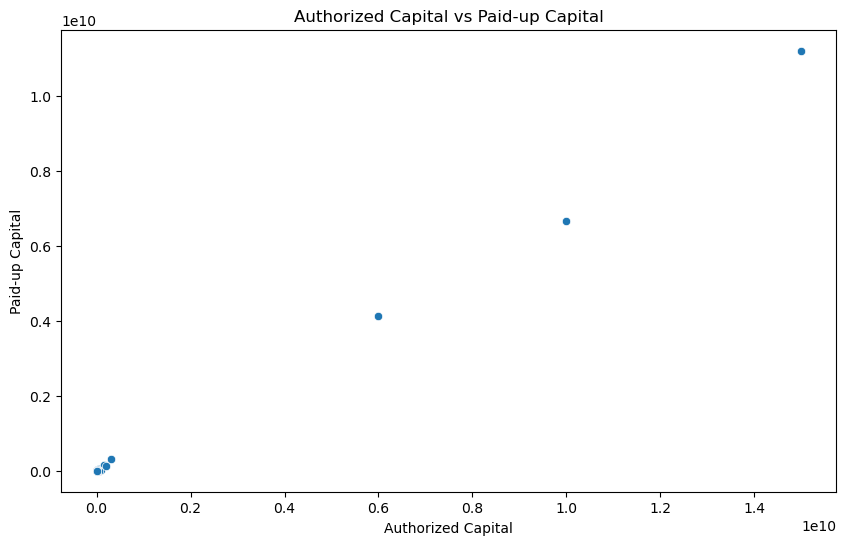

In [9]:
# EDA - Relationship between Authorized Capital and Paid-up Capital
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AUTHORIZED_CAP', y='PAIDUP_CAPITAL', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Authorized Capital vs Paid-up Capital')
plt.xlabel('Authorized Capital')
plt.ylabel('Paid-up Capital')
plt.show()

In [10]:
# Print the unique values in the 'Company_Category' column
print(df['Company_Category'].unique())

['Company limited by Shares' 'Company Limited by Guarantee']


In [12]:
df['Company_Category'] =df['Company_Category'].replace(' ',np.nan)

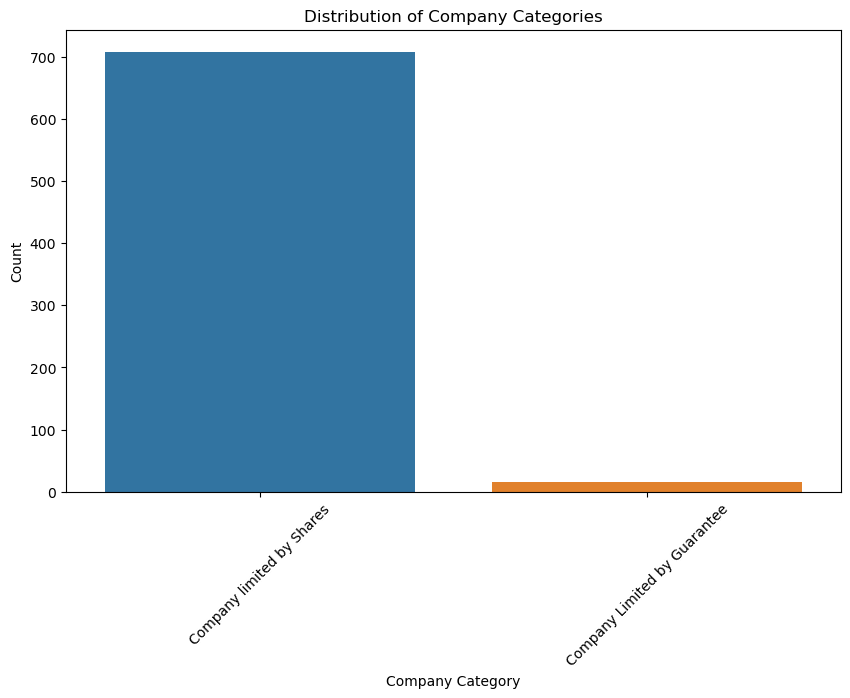

In [13]:
# EDA - Distribution of Company Categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Company_Category', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)])
plt.title('Distribution of Company Categories')
plt.xlabel('Company Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

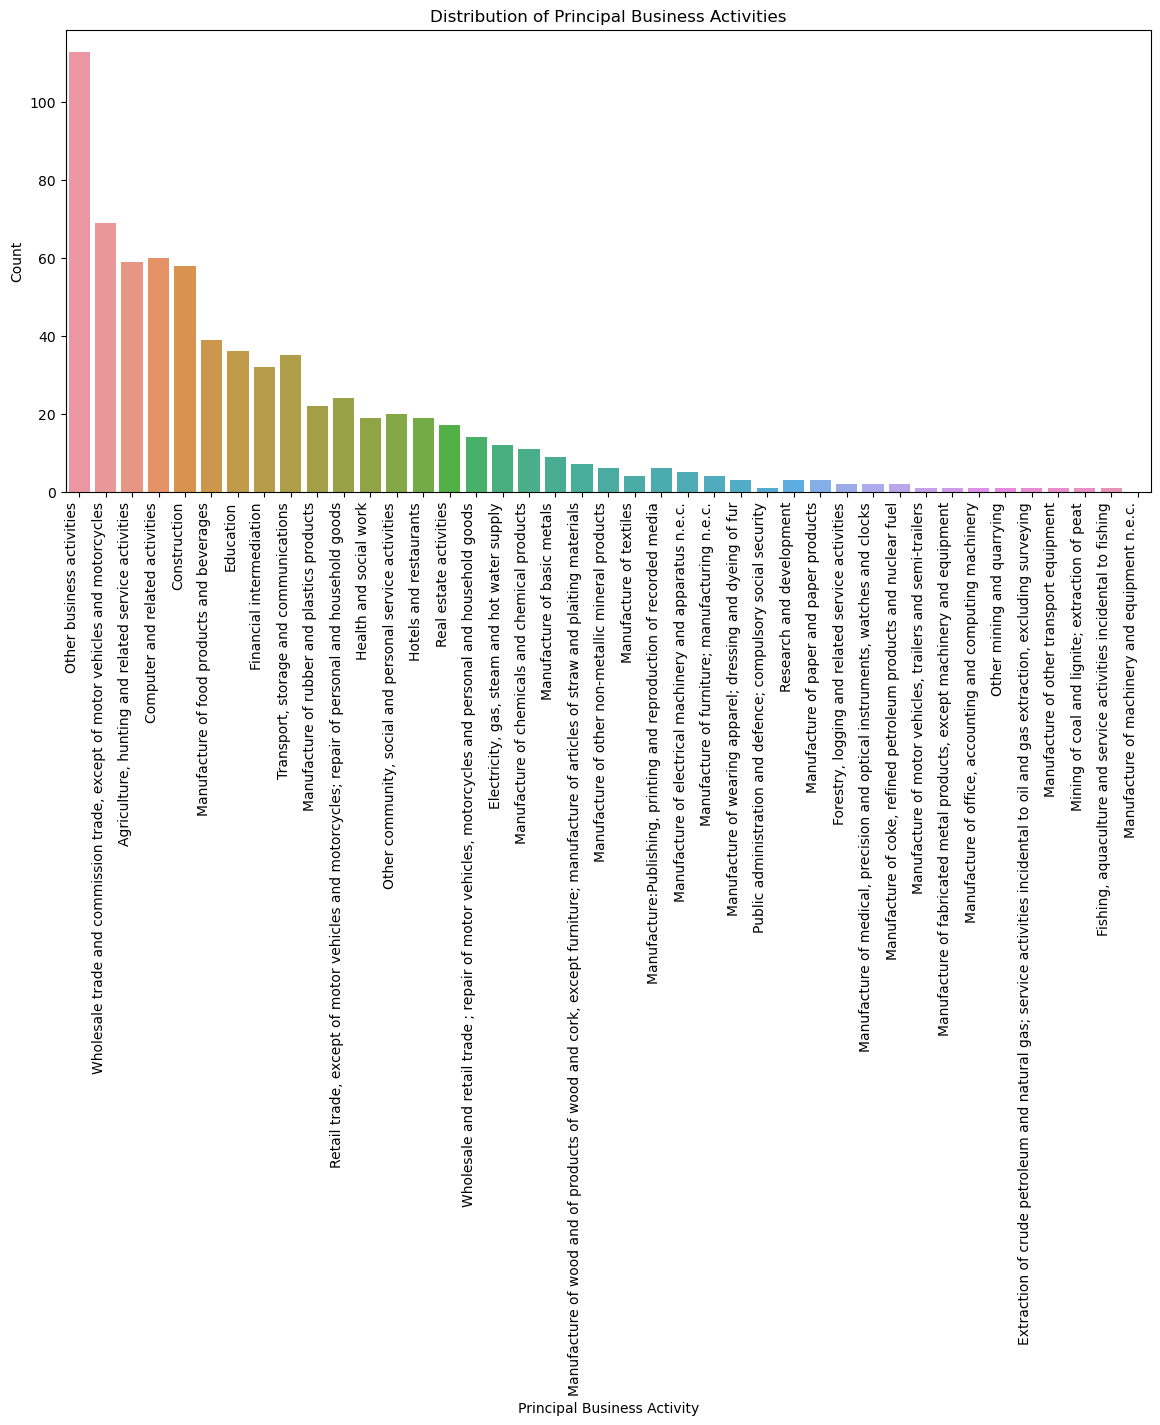

In [14]:
# EDA - Distribution of Principal Business Activities
plt.figure(figsize=(14, 6))
sns.countplot(x='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', data=df[(df['Registration_Year']<=2020) & (df['Registration_Year']>=1990)], order=df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().index)
plt.title('Distribution of Principal Business Activities')
plt.xlabel('Principal Business Activity')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()

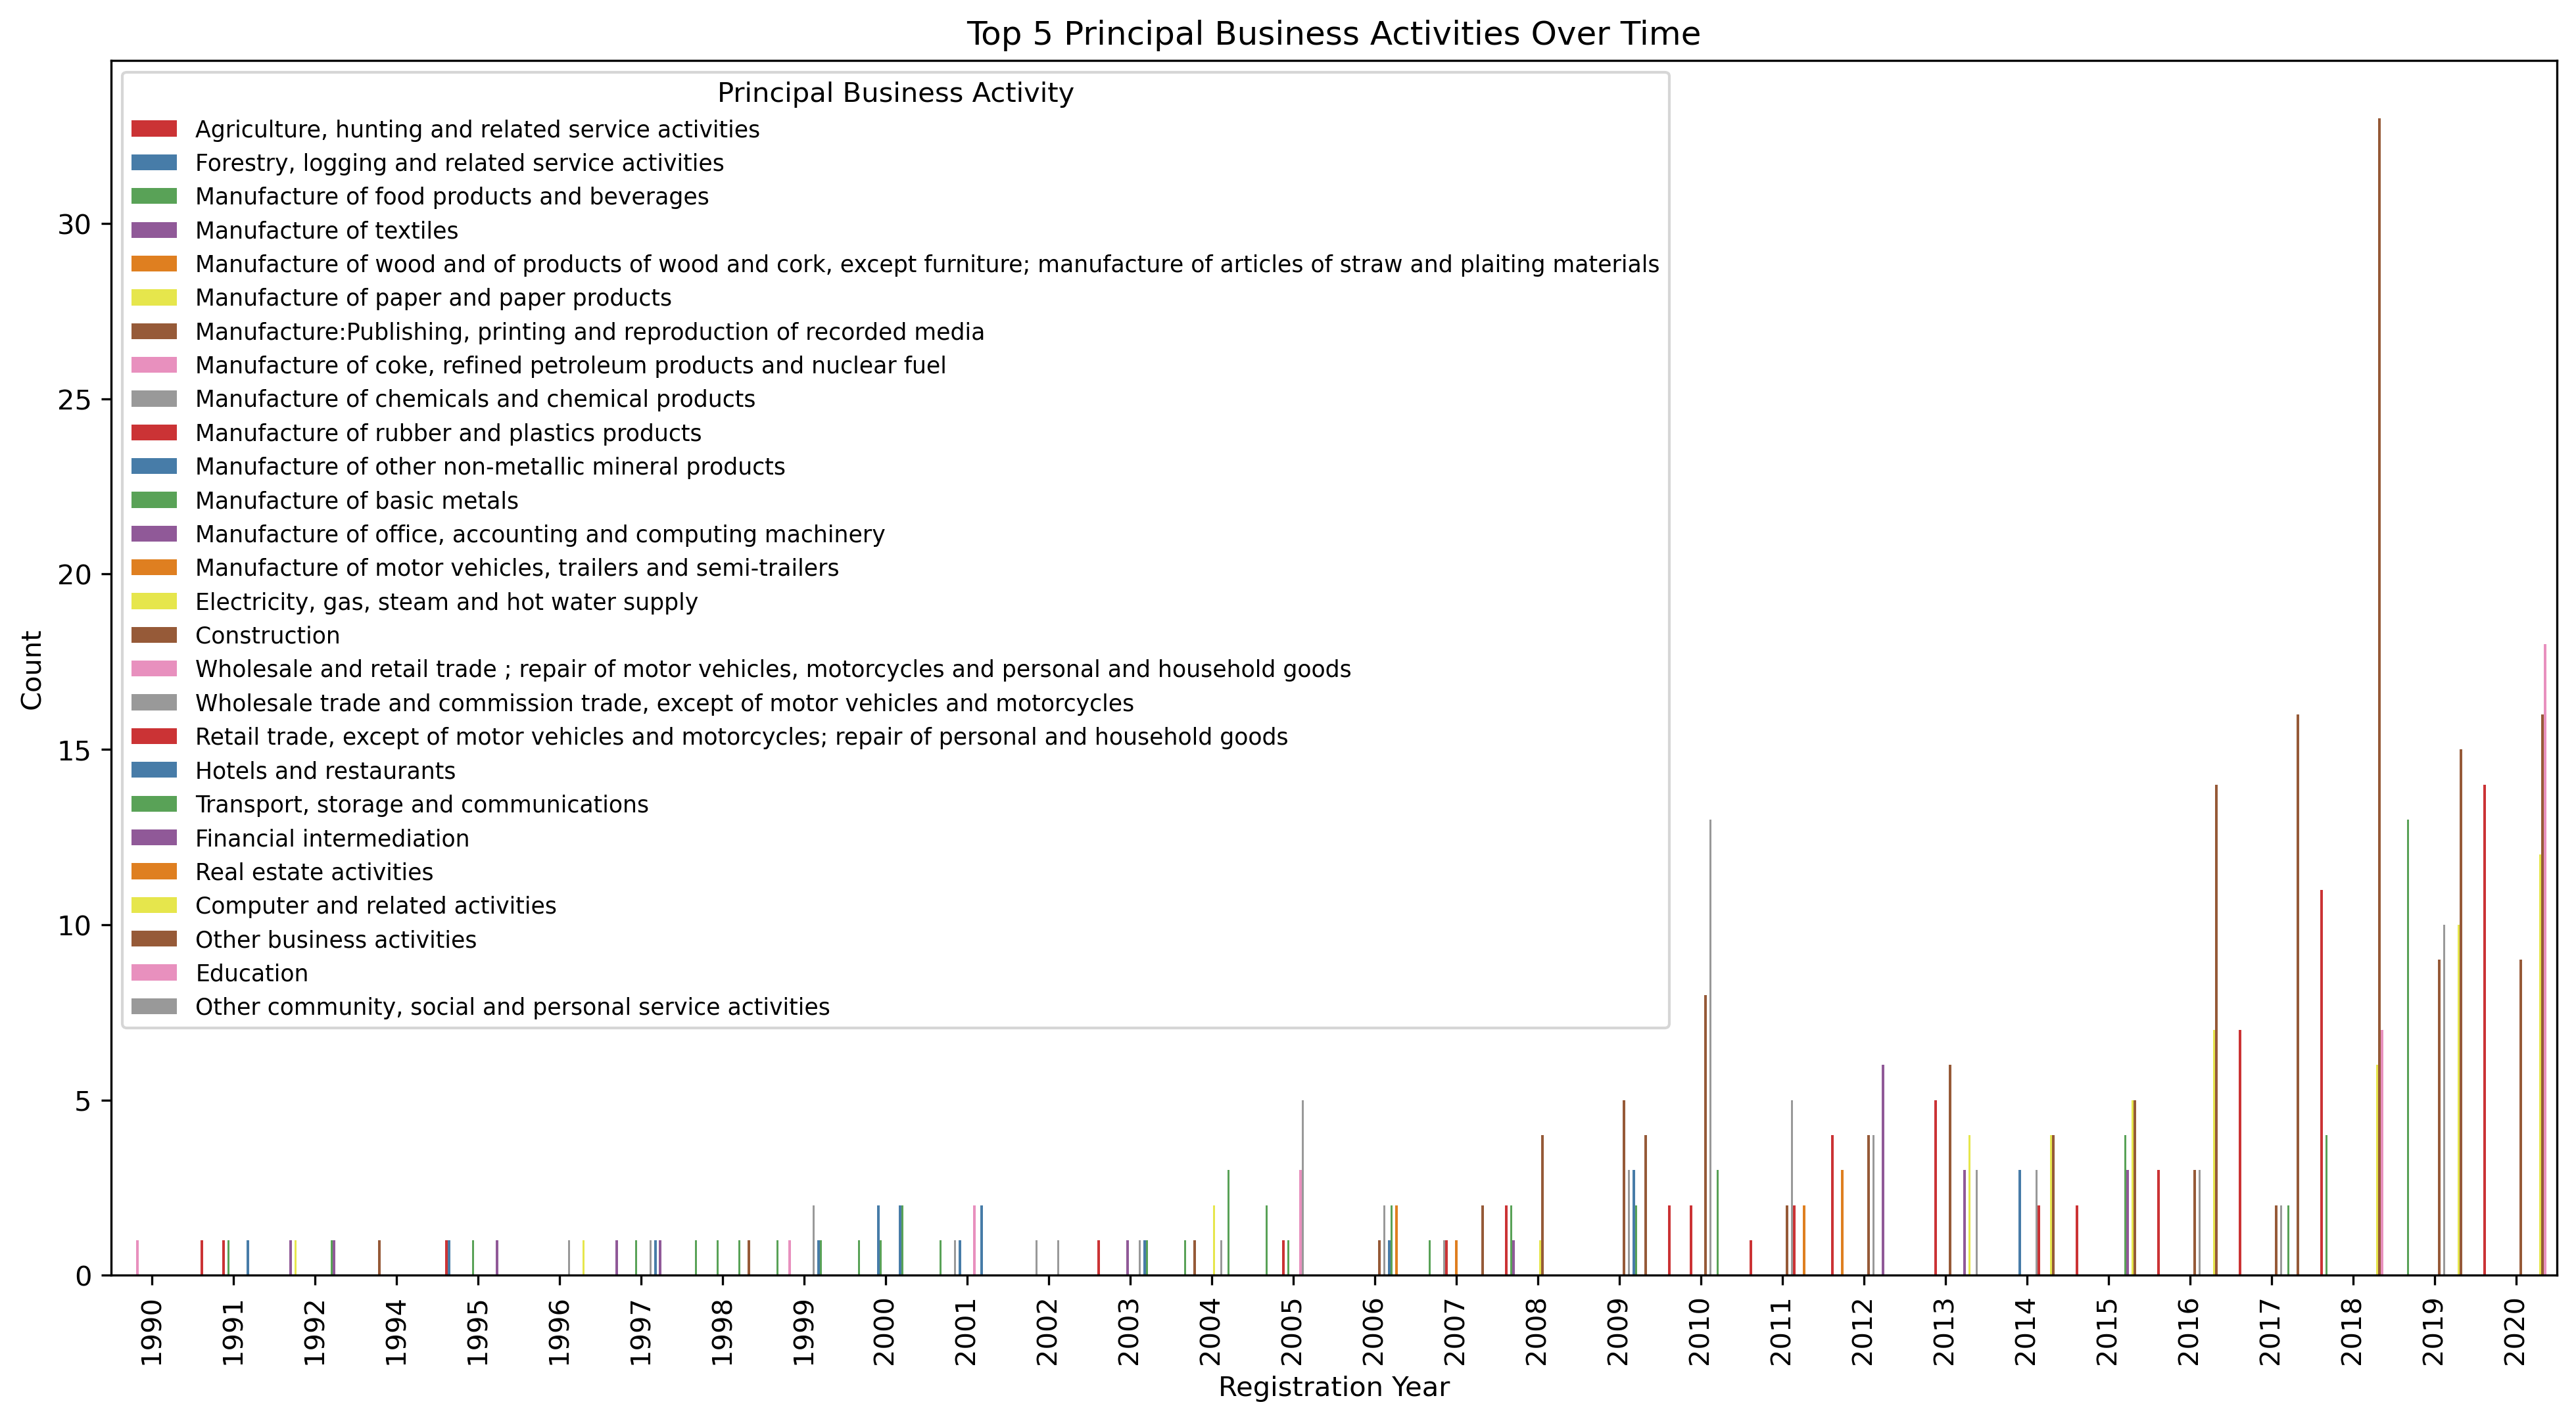

In [15]:
# Find the top 5 business activities for each year
top_activities = df.loc[(df['Registration_Year']>=1990) & (df['Registration_Year'] <= 2020)].groupby('Registration_Year')['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].apply(lambda x: x.value_counts().nlargest(5).index.tolist())

# Filter the dataframe to include only the top activities
df_top_activities = df[df.apply(lambda x: x['Registration_Year'] in top_activities.index and x['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'] in top_activities.loc[x['Registration_Year']], axis=1)]

plt.figure(figsize=(16, 8),dpi=300)
sns.countplot(x='Registration_Year', hue='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', data=df_top_activities, palette='Set1')
plt.title('Top 5 Principal Business Activities Over Time')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Principal Business Activity', fontsize='small')
plt.show()

In [16]:
# Filter companies registered between 2013 and 2020
filtered_df = df[(df['Registration_Year'] >= 2013) & (df['Registration_Year'] <= 2020)]

# Get the top 5 business activities
top_business_activities = filtered_df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().head(5)

# Print the result
print("Top 5 PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN from 2013 to 2020:")
print(top_business_activities)

Top 5 PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN from 2013 to 2020:
Other business activities                              104
Computer and related activities                         48
Agriculture, hunting and related service activities     46
Education                                               33
Construction                                            32
Name: PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN, dtype: int64


#### AUTHORIZED_CAP

In [17]:
# Convert columns to appropriate data types
# Use .loc to ensure you're modifying the original DataFrame
df.loc[:, 'AUTHORIZED_CAP'] = df['AUTHORIZED_CAP'].astype(float)
df.loc[:, 'PAIDUP_CAPITAL'] = df['PAIDUP_CAPITAL'].astype(float)
# Group by 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN' and calculate the mean of 'AUTHORIZED_CAP' and 'PAIDUP_CAPITAL'
grouped_df = df.groupby('PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN')[['AUTHORIZED_CAP', 'PAIDUP_CAPITAL']].mean().reset_index()


C:\Users\kings\AppData\Local\Temp\ipykernel_5732\2524205423.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'AUTHORIZED_CAP'] = df['AUTHORIZED_CAP'].astype(float)


##### Trend analysis of Authorized capital

In [36]:
# Ensure the DataFrame is sorted by the time column
df = df.sort_values(by='Registration_Year')

# Calculate the percentage change in authorized capital for each activity over time
df['CAPITAL_CHANGE'] = df.groupby(['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', 'Registration_Year'])['AUTHORIZED_CAP'].pct_change().fillna(0)

# Group by 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN' and calculate the mean of 'CAPITAL_CHANGE'
activity_trend_df = df.groupby(['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN','Registration_Year'])['CAPITAL_CHANGE'].mean().reset_index()

# Print the new DataFrame with the trend analysis
activity_trend_df2= activity_trend_df.interpolate()
print("PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN and CAPITAL_CHANGE")
activity_trend_df2


PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN and CAPITAL_CHANGE


,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,Registration_Year,CAPITAL_CHANGE
0,"Agriculture, hunting and related service activ...",1976,0.000000
1,"Agriculture, hunting and related service activ...",1980,237.595238
2,"Agriculture, hunting and related service activ...",1984,0.000000
3,"Agriculture, hunting and related service activ...",1987,0.000000
4,"Agriculture, hunting and related service activ...",1991,0.000000
...,...,...,...
308,"Wholesale trade and commission trade, except o...",2017,-0.233333
309,"Wholesale trade and commission trade, except o...",2018,1.666667
310,"Wholesale trade and commission trade, except o...",2019,6.440000
311,"Wholesale trade and commission trade, except o...",2020,2.310476


In [33]:
#Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Activity_1', 'Activity_2', 'Comparison'])

# Comparative Analysis: This compares the mean paid-up capital of all business activities.
# It helps in understanding their relative performance and market standing.
for i in range(len(grouped_df) - 1):
    for j in range(i + 1, len(grouped_df)):
        activity1_capital = grouped_df.loc[i, 'PAIDUP_CAPITAL']
        activity2_capital = grouped_df.loc[j, 'PAIDUP_CAPITAL']
        comparison = activity1_capital / activity2_capital
        new_row = pd.DataFrame({'Activity_1': [grouped_df.loc[i, 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']],
                                'Activity_2': [grouped_df.loc[j, 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']],
                                'Comparison': [comparison]})
        results_df = pd.concat([results_df, new_row], ignore_index=True)

# Print the results DataFrame
results_df

,Activity_1,Activity_2,Comparison
0,"Agriculture, hunting and related service activ...",Computer and related activities,47.097501
1,"Agriculture, hunting and related service activ...",Construction,4.040946
2,"Agriculture, hunting and related service activ...",Education,69.739434
3,"Agriculture, hunting and related service activ...","Electricity, gas, steam and hot water supply",0.005705
4,"Agriculture, hunting and related service activ...",Extraction of crude petroleum and natural gas;...,104.519224
...,...,...,...
815,"Retail trade, except of motor vehicles and mot...",Wholesale and retail trade ; repair of motor v...,0.144277
816,"Retail trade, except of motor vehicles and mot...","Wholesale trade and commission trade, except o...",0.531434
817,"Transport, storage and communications",Wholesale and retail trade ; repair of motor v...,1.185567
818,"Transport, storage and communications","Wholesale trade and commission trade, except o...",4.366937


### Liquidity Ratios

In [34]:
# Liquidity Ratios: This calculates the liquidity ratio (authorized capital to paid-up capital) for each company.
# It is crucial for assessing the financial health of a company.
# Make sure 'df' is the original DataFrame or explicitly create a copy if it's a subset
df = df.copy()

# Calculate the liquidity ratio without warnings
df.loc[:, 'LIQUIDITY_RATIO'] = df['AUTHORIZED_CAP'] / df['PAIDUP_CAPITAL']

# Now, let's create a smaller DataFrame to showcase the liquidity ratios
# Selecting relevant columns for the smaller DataFrame
liquidity_df = df[['Company_Name', 'AUTHORIZED_CAP', 'PAIDUP_CAPITAL', 'LIQUIDITY_RATIO']].copy()

# Displaying the smaller DataFrame
print("Smaller DataFrame showcasing Liquidity Ratios:")
liquidity_df

Smaller DataFrame showcasing Liquidity Ratios:


,Company_Name,AUTHORIZED_CAP,PAIDUP_CAPITAL,LIQUIDITY_RATIO
478,TRIPURA SAVINGS & FINANCE CO PVT LTD,1.000000e+05,4.000000e+03,25.000000
119,TRIPURA HANDLOOM & HANDICRAFTSDEVELOPMENT CORP...,6.200000e+08,6.174115e+08,1.004193
121,TRIPURA JUTE MILLS LIMITED,1.120000e+09,1.110401e+09,1.008645
699,TRIPURA INDUSTRIAL DEVELOPMENTCORPORATION LTD,2.000000e+08,1.616996e+08,1.236861
322,PAUL BROTHERS ENTERPRISES PVT LTD,2.000000e+07,2.000000e+06,10.000000
...,...,...,...,...
129,TRIPURA PLYWOOD CORPORATION PVT LTD,1.000000e+05,1.000000e+05,1.000000
47,NOTTING CHERRA TEA CO.PVT.LTD.,1.500000e+05,1.500000e+05,1.000000
701,TRIPURA SMALL INDUSTRIES CORPORATIONLIMITED,6.000000e+08,5.955816e+08,1.007419
202,TRIPURA STEEL REROLLING MILL & FOUNDRY PVT. LTD.,0.000000e+00,0.000000e+00,NaN


# Model

C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible start

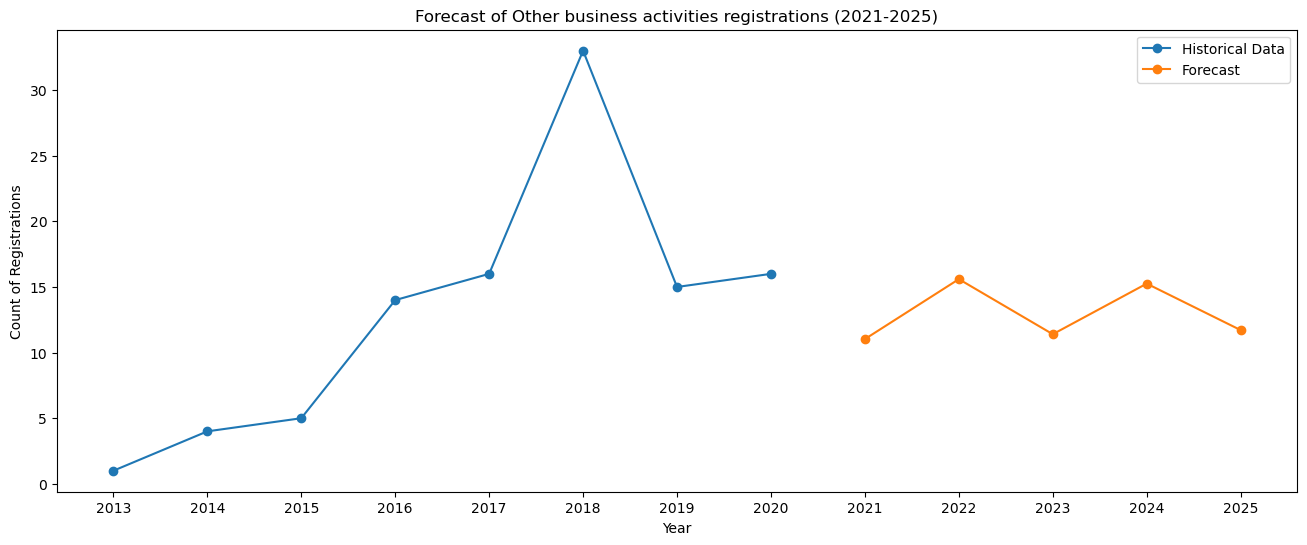

Forecasted registrations for Other business activities for 2021-2025:
2021-01-01    11.029497
2022-01-01    15.596254
2023-01-01    11.400448
2024-01-01    15.255435
2025-01-01    11.713583
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

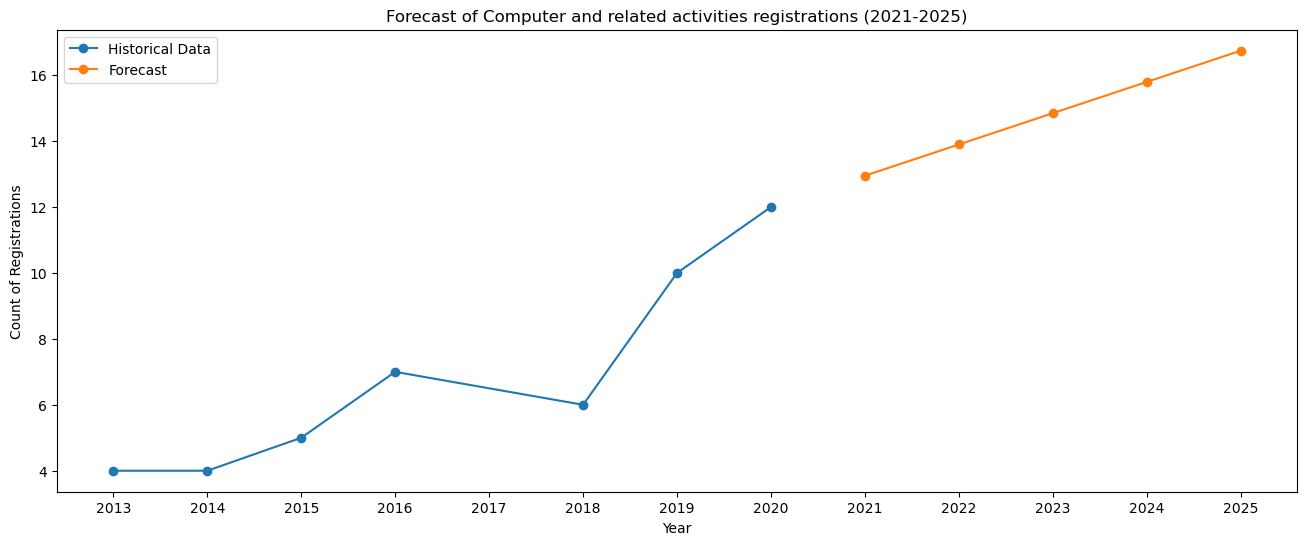

Forecasted registrations for Computer and related activities for 2021-2025:
7     12.949169
8     13.897912
9     14.846229
10    15.794121
11    16.741588
Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

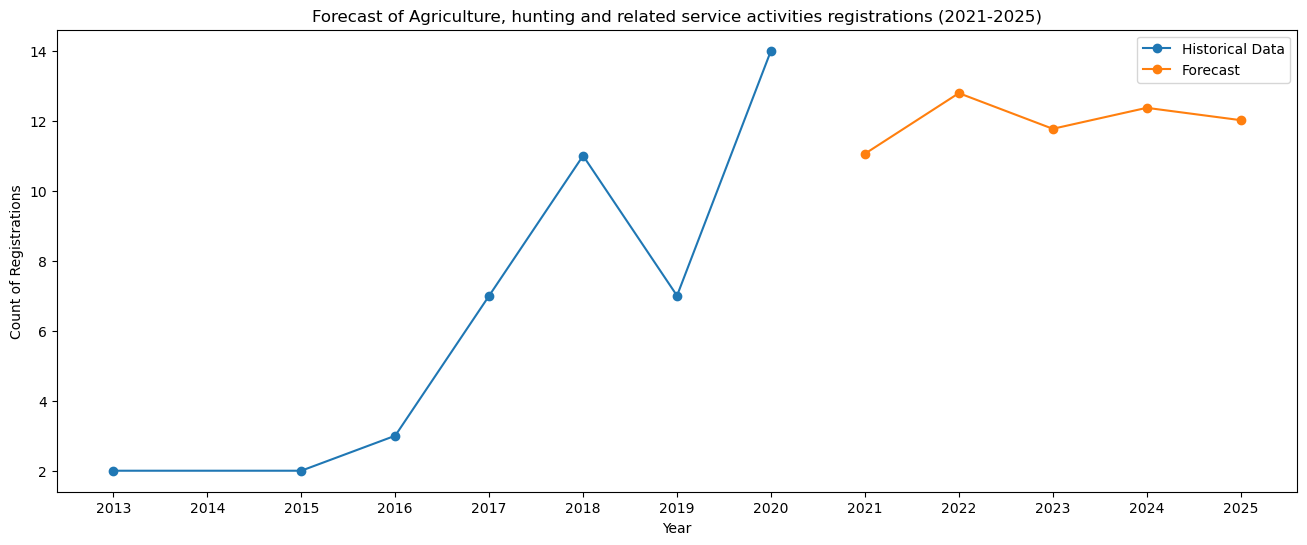

Forecasted registrations for Agriculture, hunting and related service activities for 2021-2025:
7     11.056068
8     12.788096
9     11.769078
10    12.368605
11    12.015880
Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


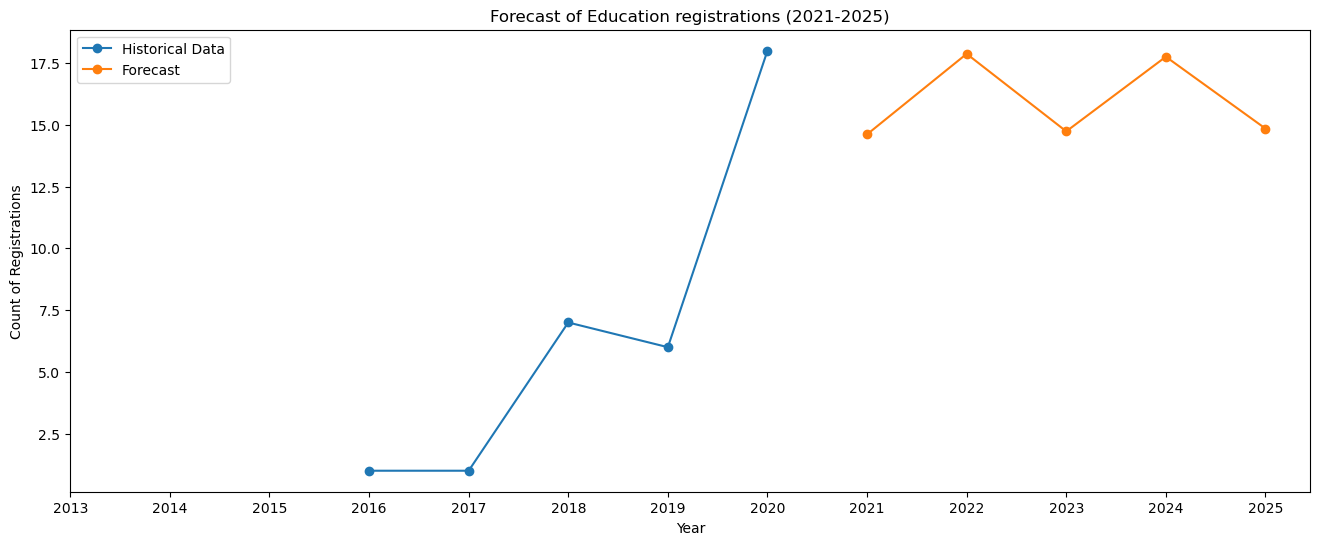

Forecasted registrations for Education for 2021-2025:
2021-01-01    14.614647
2022-01-01    17.873806
2023-01-01    14.736137
2024-01-01    17.756844
2025-01-01    14.848739
Freq: AS-JAN, Name: predicted_mean, dtype: float64


C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kings\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

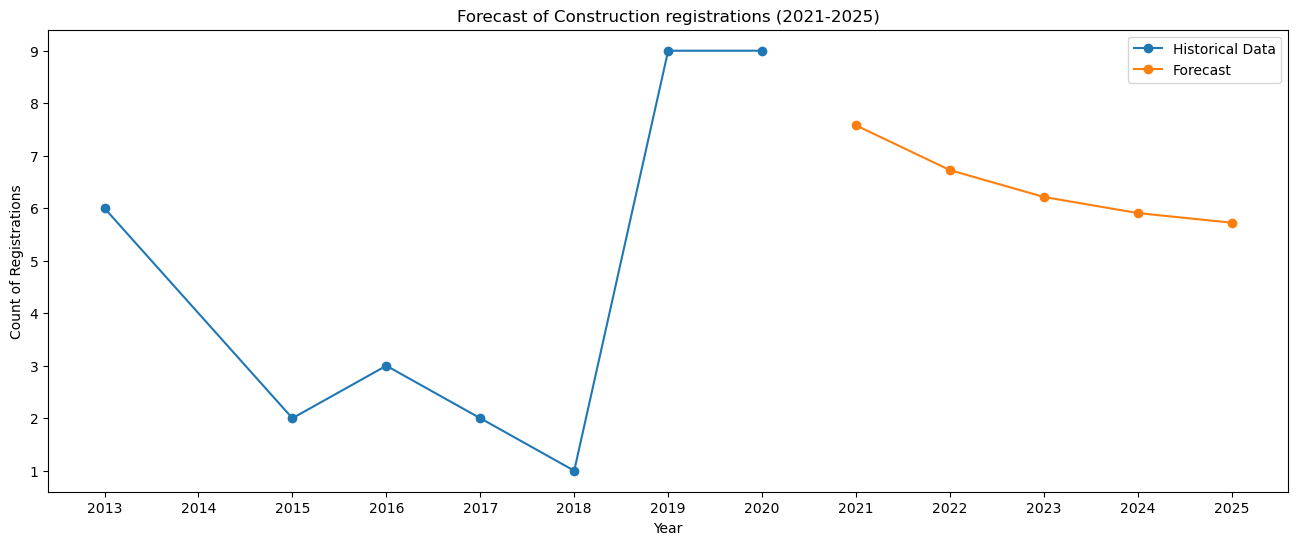

Forecasted registrations for Construction for 2021-2025:
7     7.577936
8     6.725385
9     6.214266
10    5.907842
11    5.724135
Name: predicted_mean, dtype: float64


In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' is your DataFrame
# Convert 'Latest_Year_AR' to datetime format
df['Latest_Year_AR'] = pd.to_datetime(df['Latest_Year_AR'], errors='coerce')

# Define the top 5 categories for forecasting
top_categories = [
    'Other business activities',
    'Computer and related activities',
    'Agriculture, hunting and related service activities',
    'Education',
    'Construction'
]

# Loop through each category for forecasting
for category_to_forecast in top_categories:
    # Filter data for the specific category and the specified time range
    category_df = df[(df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'] == category_to_forecast) & 
                     (df['Registration_Year'] >= 2013) & (df['Registration_Year'] <= 2020)]

    # Extract relevant features and target variable
    X = category_df[['Registration_Year']]
    y = category_df.groupby('Registration_Year').size()

    # Convert 'Registration_Year' to DateTime format
    y.index = pd.to_datetime(y.index, format='%Y')

    # Fit ARIMA model
    model = ARIMA(y, order=(1, 1, 1))  # Adjust order as needed
    fit_model = model.fit()

    # Forecast registrations for the next 5 years (2021-2025)
    forecast_steps = 5
    forecast_values = fit_model.forecast(steps=forecast_steps)

    # Plot the forecast
    plt.figure(figsize=(16, 6))
    plt.plot(y.index.year, y.values, marker='o', label='Historical Data')
    plt.plot(range(y.index.year.max() + 1, y.index.year.max() + 1 + forecast_steps), forecast_values, marker='o', label='Forecast')
    plt.title(f'Forecast of {category_to_forecast} registrations (2021-2025)')
    plt.xticks(np.arange(2013, 2026, 1))
    plt.xlabel('Year')
    plt.ylabel('Count of Registrations')
    plt.legend()
    plt.show()

    # Display the forecasted values
    print(f"Forecasted registrations for {category_to_forecast} for 2021-2025:")
    print(forecast_values)